In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
# loading bank data 
bank = pd.read_csv("bank-full.csv", sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
label_encoder = preprocessing.LabelEncoder()
bank['job']= label_encoder.fit_transform(bank['job']) 
bank['marital']= label_encoder.fit_transform(bank['marital']) 
bank['education']= label_encoder.fit_transform(bank['education']) 
bank['default']= label_encoder.fit_transform(bank['default']) 
bank['housing']= label_encoder.fit_transform(bank['housing']) 
bank['loan']= label_encoder.fit_transform(bank['loan']) 
bank['contact']= label_encoder.fit_transform(bank['contact']) 
bank['month']= label_encoder.fit_transform(bank['month']) 
bank['poutcome']= label_encoder.fit_transform(bank['poutcome']) 
bank['y']= label_encoder.fit_transform(bank['y'])  
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [6]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


<AxesSubplot:xlabel='loan', ylabel='age'>

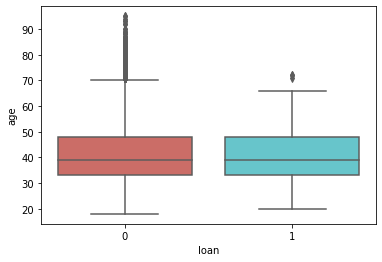

In [7]:
sb.boxplot(x="loan",y="age",data=bank,palette="hls")

<AxesSubplot:xlabel='loan', ylabel='count'>

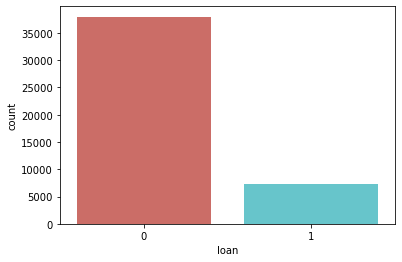

In [8]:
sb.countplot(x="loan",data=bank,palette="hls") 

In [9]:
pd.crosstab(bank.loan,bank.default)  

default,0,1
loan,,
0,37453,514
1,6943,301


<AxesSubplot:xlabel='loan'>

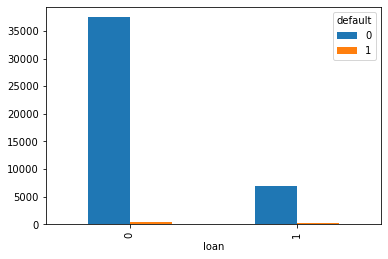

In [10]:
pd.crosstab(bank.loan,bank.default).plot(kind='bar') 

<AxesSubplot:xlabel='default', ylabel='count'>

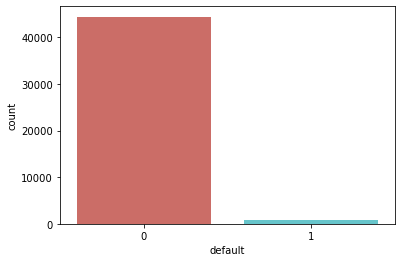

In [11]:
sb.countplot(x="default",data=bank,palette="hls") 

<AxesSubplot:xlabel='y', ylabel='count'>

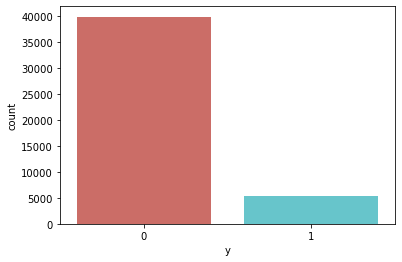

In [12]:
sb.countplot(x="y",data=bank,palette="hls") 

<AxesSubplot:xlabel='marital'>

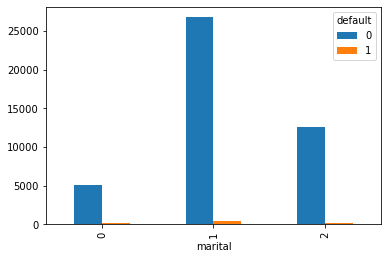

In [13]:
pd.crosstab(bank.marital,bank.default).plot(kind="bar")  

<AxesSubplot:xlabel='education'>

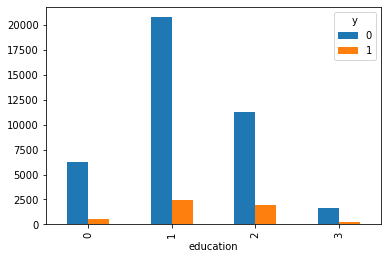

In [14]:
pd.crosstab(bank.education,bank.y).plot(kind="bar")  

<AxesSubplot:xlabel='marital'>

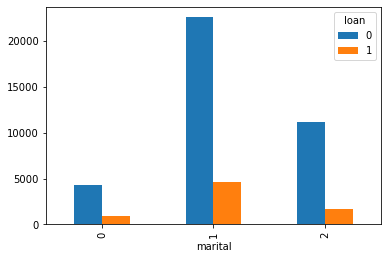

In [15]:
pd.crosstab(bank.marital,bank.loan).plot(kind="bar")  

In [16]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape   

(45211, 17)

In [22]:
x=bank.iloc[:,0:16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [26]:
y=bank.iloc[:,16]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [27]:
classifier = LogisticRegression()
classifier.fit(x,y) 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
classifier.coef_  # coefficients of features   

array([[-3.16802510e-02,  1.45562359e-02, -9.21153757e-02,
        -1.31789867e-02, -4.79306390e-03,  4.00082184e-05,
        -1.81574381e-01, -5.34974933e-02, -1.86731320e-01,
        -8.41855234e-03, -6.00572603e-02,  3.27099854e-03,
        -2.67026891e-01, -1.23824925e-03,  1.19987817e-01,
        -1.80555425e-01]])

In [29]:
y_pred = classifier.predict(x)
bank["y_pred"] = y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [31]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948524,0.051476
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948866,0.051134
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946950,0.053050
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960851,0.039149
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903382,0.096618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.615393,0.384607
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.920150,0.079850
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.671878,0.328122
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.940337,0.059663


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix) 


[[39279   643]
 [ 4438   851]]


In [30]:
pd.crosstab(bank.y,bank.y_pred)

y_pred,0,1
y,,
0,39279,643
1,4438,851


In [35]:
#accracy (y_pred)
accuracy = sum(y==y_pred)/bank.shape[0]
accuracy 

0.8876158457012674

In [36]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score  

0.5723967867991099

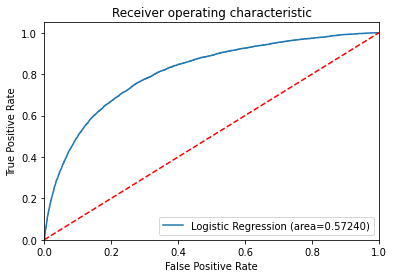

In [39]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.5f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [41]:
y_prob1 = pd.DataFrame(classifier.predict_proba(x)[:,1]) 
y_prob1

,0
0,0.051476
1,0.051134
2,0.053050
3,0.039149
4,0.096618
...,...
45206,0.384607
45207,0.079850
45208,0.328122
45209,0.059663


In [42]:
import statsmodels.api as sm   

In [46]:
logit = sm.Logit(y, x)   
logit.fit().summary

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x00000205A98EDE50>>